In [62]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [22]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [25]:
%%time
query = """
select ilink,
count(*) as N_Pants2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Pants'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 345 ms, sys: 290 ms, total: 635 ms
Wall time: 3.76 s


In [13]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [47]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [51]:
DF['N_PANTS2018'].fillna(0,inplace=True)

In [52]:
print DF.shape
DF.head(5)

(451061, 42)


,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,ENDUSE_HAS_CORE,ENDUSE_HAS_WEAREVER,ENDUSE_HAS_PUREJILL,PAYTYPE_HAS_JJC,PAYTYPE_HAS_VISA,PAYTYPE_HAS_MC,PAYTYPE_HAS_AMEX,PAYTYPE_HAS_DISC,PAYTYPE_HAS_DEBIT,PAYTYPE_HAS_CASH,PAYTYPE_HAS_CK,PAYTYPE_HAS_OTHER,FABRICCATEGORY_HAS_COTTON/COTTONBL,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND,FABRICCATEGORY_HAS_LINEN/LINENBL,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_PANTS2018
0,0000000004,Pants,9.0,378.84,42.093333,15.642059,244.674025,208.1,23.122222,3.723835,13.866944,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556,0.444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.444,0.0,0.0
1,0000000004,Woven Shirts,3.0,134.28,44.760000,15.190086,230.738700,64.7,21.566667,6.690541,44.763333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.667,0.000,0.0,0.0
2,0000000004,Knit Tops,7.0,215.86,30.837143,10.477951,109.787457,121.1,17.300000,2.733740,7.473333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.429,0.571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.571,0.0,0.0
3,0000000023,Pants,1.0,27.99,27.990000,NaN,NaN,12.0,12.000000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0
4,0000000023,Knit Tops,1.0,27.30,27.300000,NaN,NaN,11.7,11.700000,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000,0.000,0.0,0.0


In [55]:
DFPants = DF[DF.DEPARTMENT_NAME=='Pants']

In [71]:
NUMERIC_FTS = ['TOTAL_BOUGHT','SHIPPED_SOLD_AMT','AVG_SHIPPED_SOLD_AMT',
       'STD_SHIPPED_SOLD_AMT','VAR_SHIPPED_SOLD_AMT','DISCOUNT',
       'AVG_DISCOUNT','STD_DISCOUNT','VAR_DISCOUNT','N_PANTS2018']
CATEG_FTS = ['ENDUSE_Has_Core','ENDUSE_Has_Wearever',
 'ENDUSE_Has_PureJill','PAYTYPE_Has_JJC','PAYTYPE_Has_VISA',
 'PAYTYPE_Has_MC','PAYTYPE_Has_AMEX','PAYTYPE_Has_DISC','PAYTYPE_Has_DEBIT',
 'PAYTYPE_Has_CASH','PAYTYPE_Has_CK','PAYTYPE_Has_OTHER','FABRICCATEGORY_Has_Cotton/CottonBl',
 'FABRICCATEGORY_Has_Synthetic/SynBlend','FABRICCATEGORY_Has_Linen/LinenBl',
 'ENDUSE_%_Core','ENDUSE_%_Wearever','ENDUSE_%_PureJill',
 'PAYTYPE_%_JJC','PAYTYPE_%_VISA','PAYTYPE_%_MC','PAYTYPE_%_AMEX','PAYTYPE_%_DISC',
 'PAYTYPE_%_DEBIT','PAYTYPE_%_CASH','PAYTYPE_%_CK','PAYTYPE_%_OTHER',
 'FABRICCATEGORY_%_Cotton/CottonBl','FABRICCATEGORY_%_Synthetic/SynBlend',
 'FABRICCATEGORY_%_Linen/LinenBl','N_PANTS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Pants Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT,N_PANTS2018
TOTAL_BOUGHT,1.000000,0.459049
N_PANTS2018,0.459049,1.000000


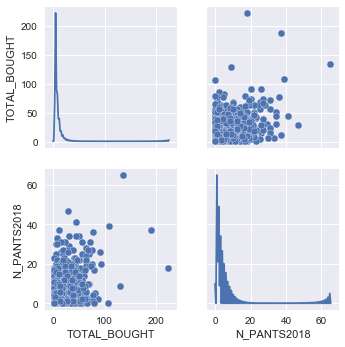

In [60]:
fts = [NUMERIC_FTS[0]]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,N_PANTS2018
SHIPPED_SOLD_AMT,1.000000,0.132843,0.226095,0.115816,0.450321
AVG_SHIPPED_SOLD_AMT,0.132843,1.000000,0.116595,0.101664,-0.008901
STD_SHIPPED_SOLD_AMT,0.226095,0.116595,1.000000,0.921498,0.087158
VAR_SHIPPED_SOLD_AMT,0.115816,0.101664,0.921498,1.000000,0.033450
N_PANTS2018,0.450321,-0.008901,0.087158,0.033450,1.000000


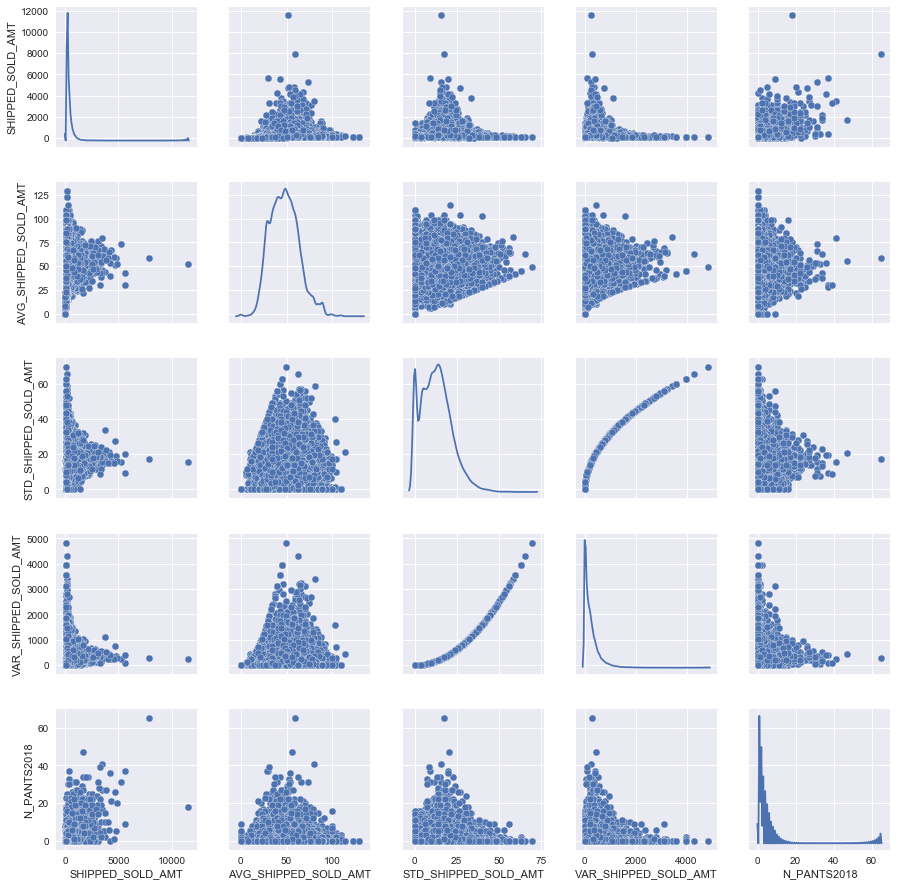

In [63]:
fts = NUMERIC_FTS[1:5]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,N_PANTS2018
DISCOUNT,1.000000,0.244896,0.186049,0.079668,0.440649
AVG_DISCOUNT,0.244896,1.000000,0.029591,0.018185,0.022140
STD_DISCOUNT,0.186049,0.029591,1.000000,0.923233,0.093069
VAR_DISCOUNT,0.079668,0.018185,0.923233,1.000000,0.040654
N_PANTS2018,0.440649,0.022140,0.093069,0.040654,1.000000


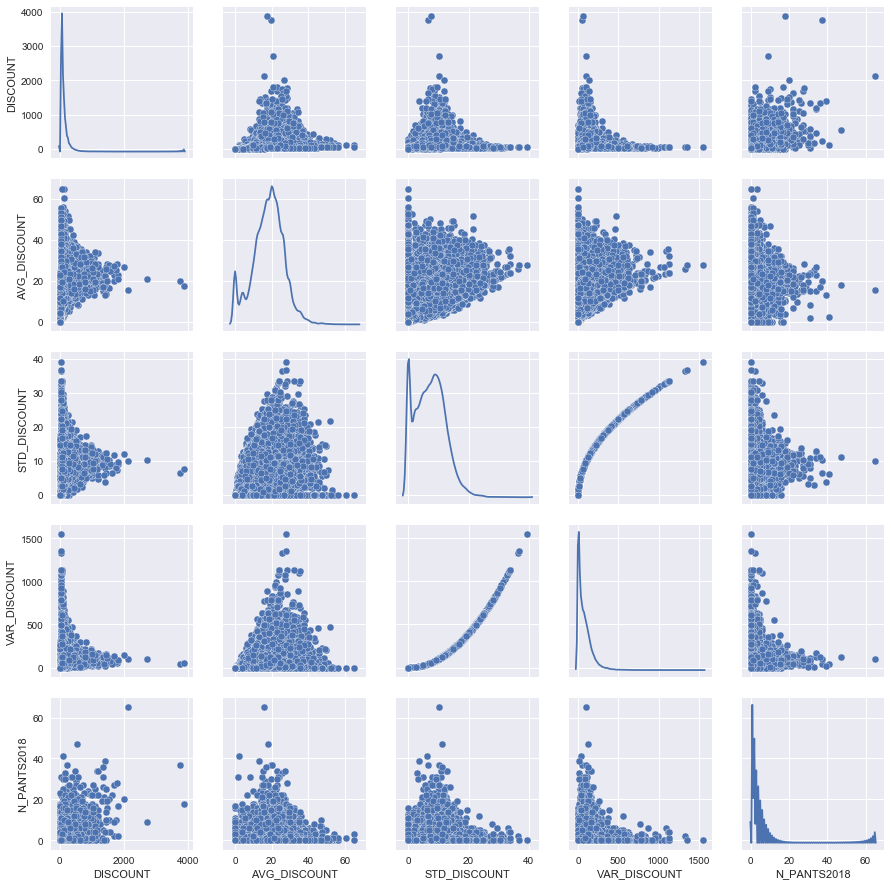

In [64]:
fts = NUMERIC_FTS[5:]
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

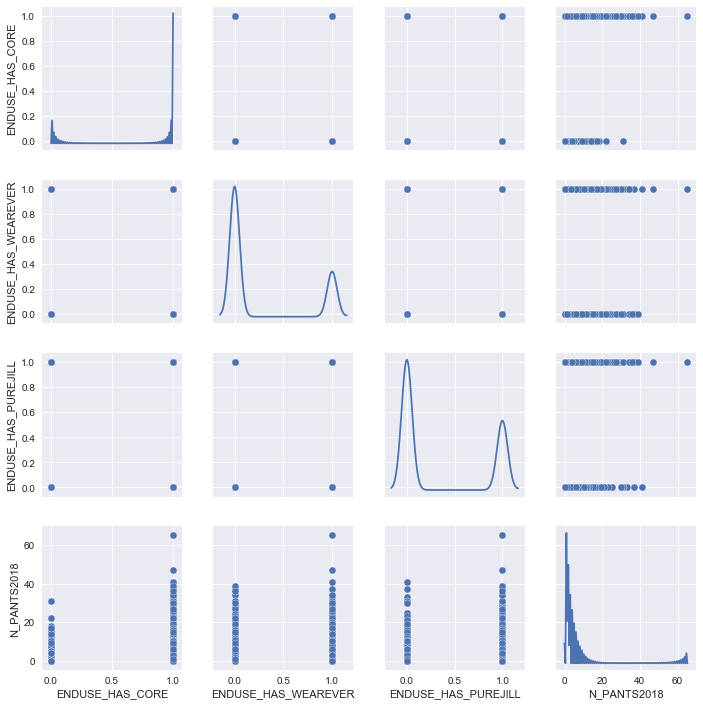

In [78]:
fts = CATEG_FTS[0:3]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

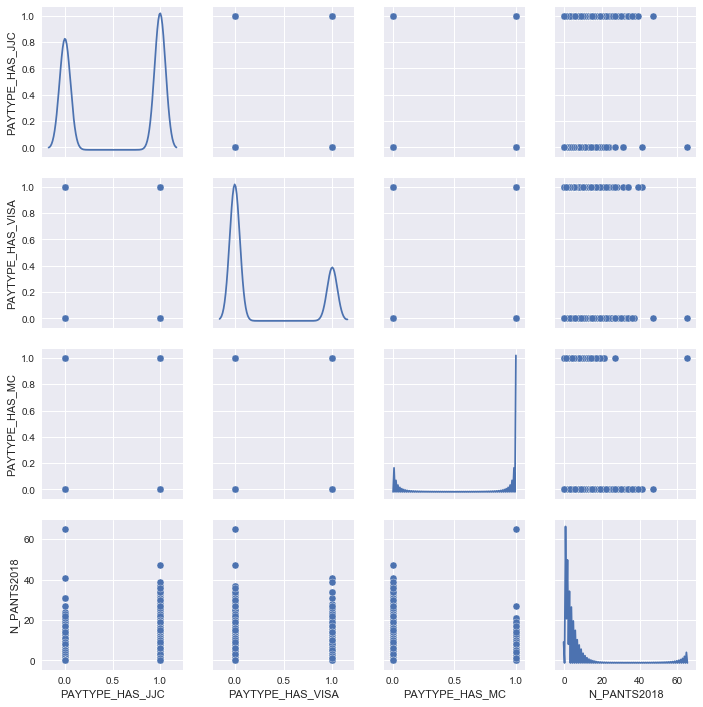

In [80]:
fts = CATEG_FTS[3:6]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

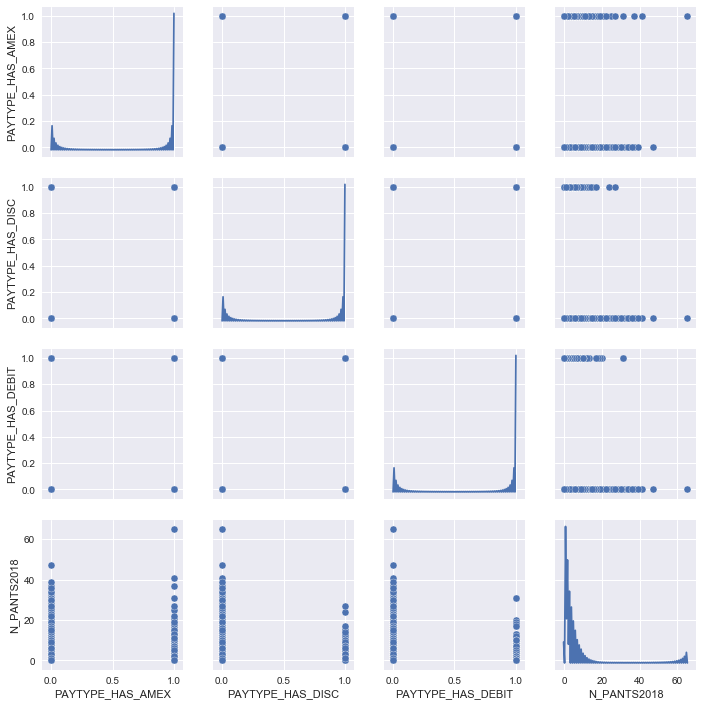

In [81]:
fts = CATEG_FTS[6:9]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

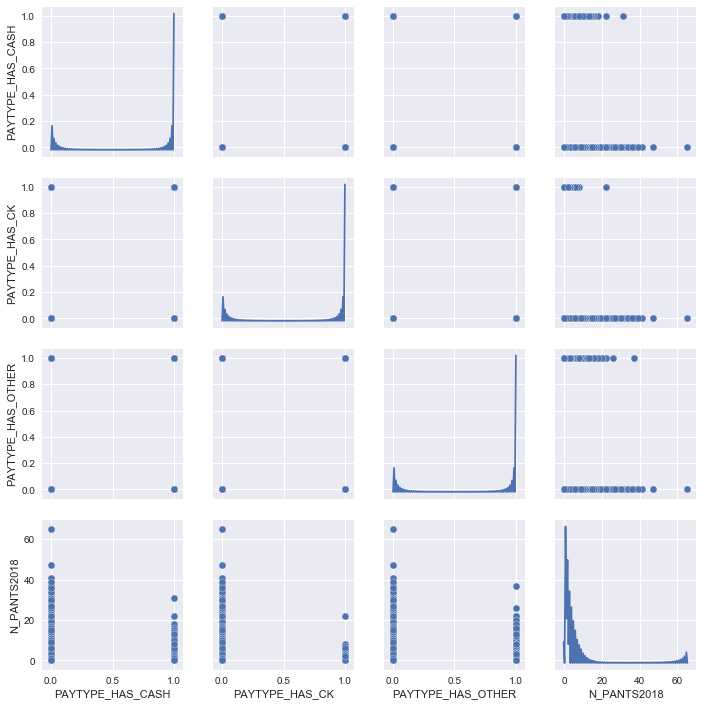

In [82]:
fts = CATEG_FTS[9:12]+['N_PANTS2018']
#display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

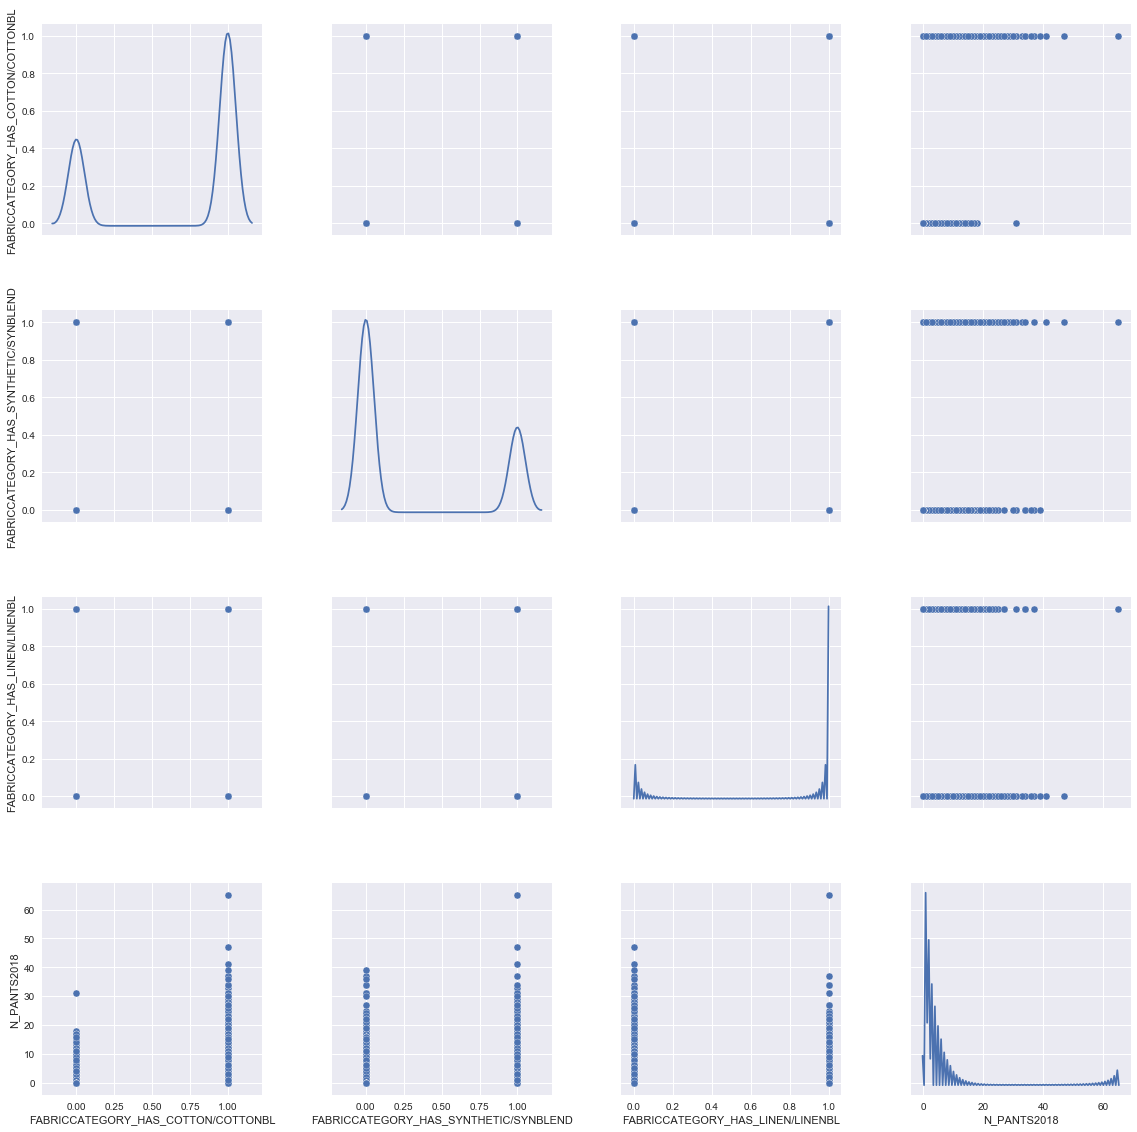

In [91]:
fts = CATEG_FTS[12:15]+['N_PANTS2018']
#display(DFPants[fts].corr())
g = sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,N_PANTS2018
ENDUSE_%_CORE,1.000000,-0.612231,-0.709413,-0.021182
ENDUSE_%_WEAREVER,-0.612231,1.000000,-0.122940,-0.011350
ENDUSE_%_PUREJILL,-0.709413,-0.122940,1.000000,0.036711
N_PANTS2018,-0.021182,-0.011350,0.036711,1.000000


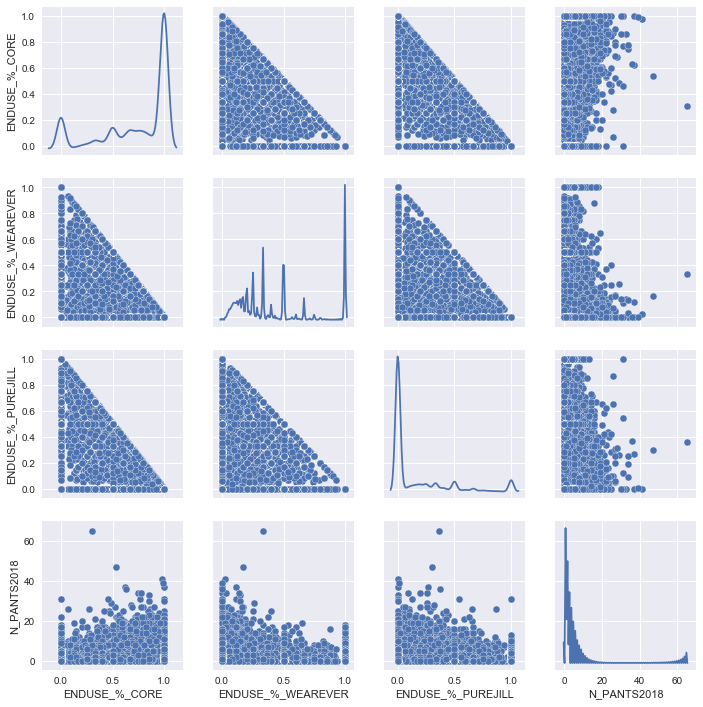

In [93]:
fts = CATEG_FTS[15:18]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,N_PANTS2018
PAYTYPE_%_JJC,1.000000,-0.604981,-0.361542,0.103783
PAYTYPE_%_VISA,-0.604981,1.000000,-0.174631,-0.062985
PAYTYPE_%_MC,-0.361542,-0.174631,1.000000,-0.035855
N_PANTS2018,0.103783,-0.062985,-0.035855,1.000000


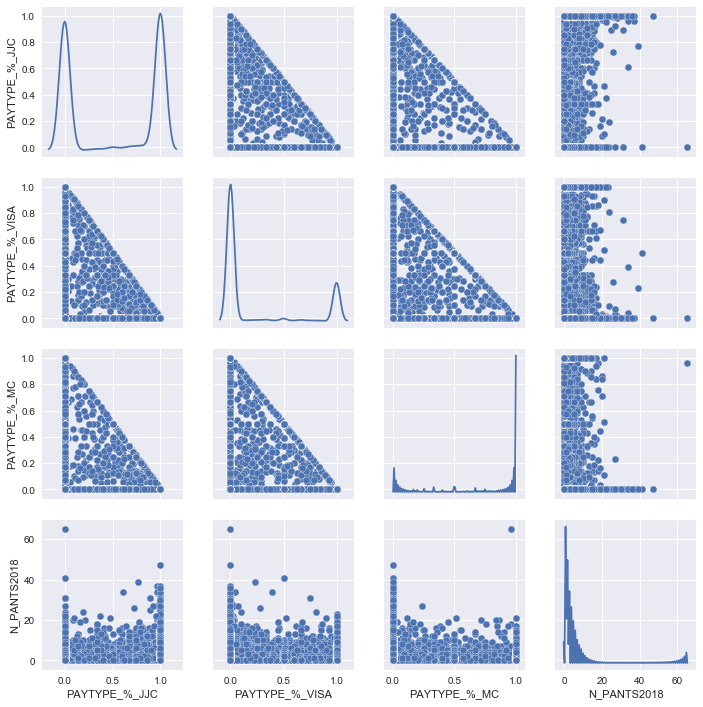

In [94]:
fts = CATEG_FTS[18:21]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,N_PANTS2018
PAYTYPE_%_AMEX,1.000000,-0.035886,-0.037039,-0.018677
PAYTYPE_%_DISC,-0.035886,1.000000,-0.018681,-0.015047
PAYTYPE_%_DEBIT,-0.037039,-0.018681,1.000000,-0.030537
N_PANTS2018,-0.018677,-0.015047,-0.030537,1.000000


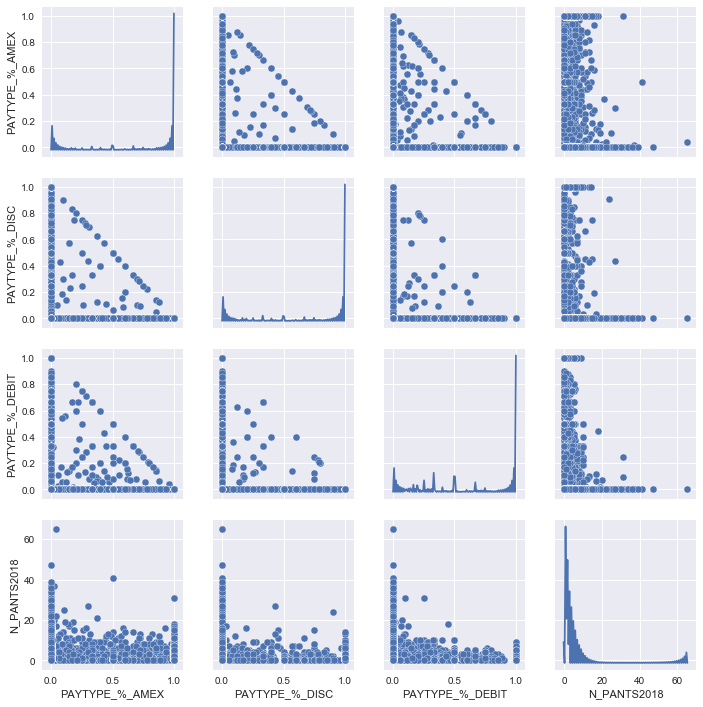

In [95]:
fts = CATEG_FTS[21:24]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,N_PANTS2018
PAYTYPE_%_CASH,1.000000,0.005440,-0.005019,-0.017201
PAYTYPE_%_CK,0.005440,1.000000,-0.001821,-0.001664
PAYTYPE_%_OTHER,-0.005019,-0.001821,1.000000,-0.021793
N_PANTS2018,-0.017201,-0.001664,-0.021793,1.000000


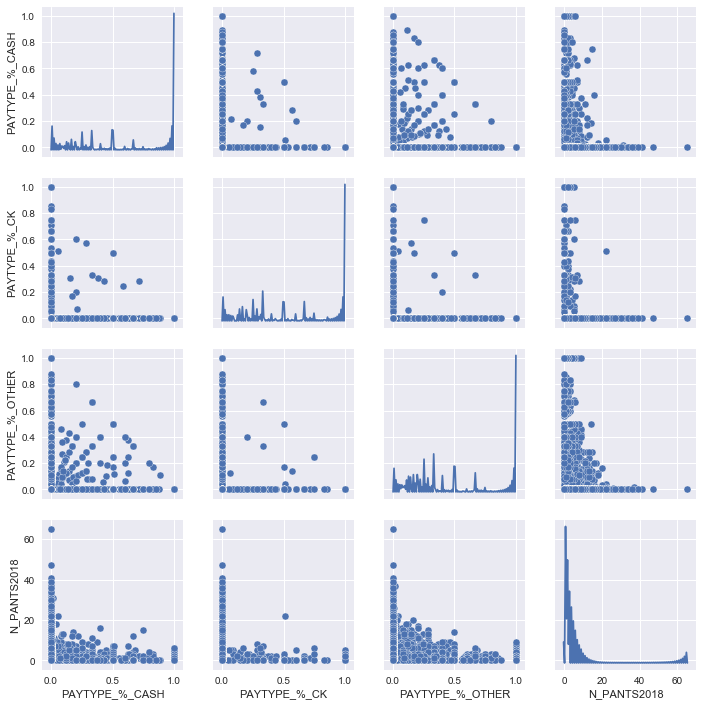

In [96]:
fts = CATEG_FTS[24:27]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_PANTS2018
FABRICCATEGORY_%_COTTON/COTTONBL,1.000000,-0.358969,-0.252887,0.031441
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,-0.358969,1.000000,-0.108754,-0.007148
FABRICCATEGORY_%_LINEN/LINENBL,-0.252887,-0.108754,1.000000,-0.033334
N_PANTS2018,0.031441,-0.007148,-0.033334,1.000000


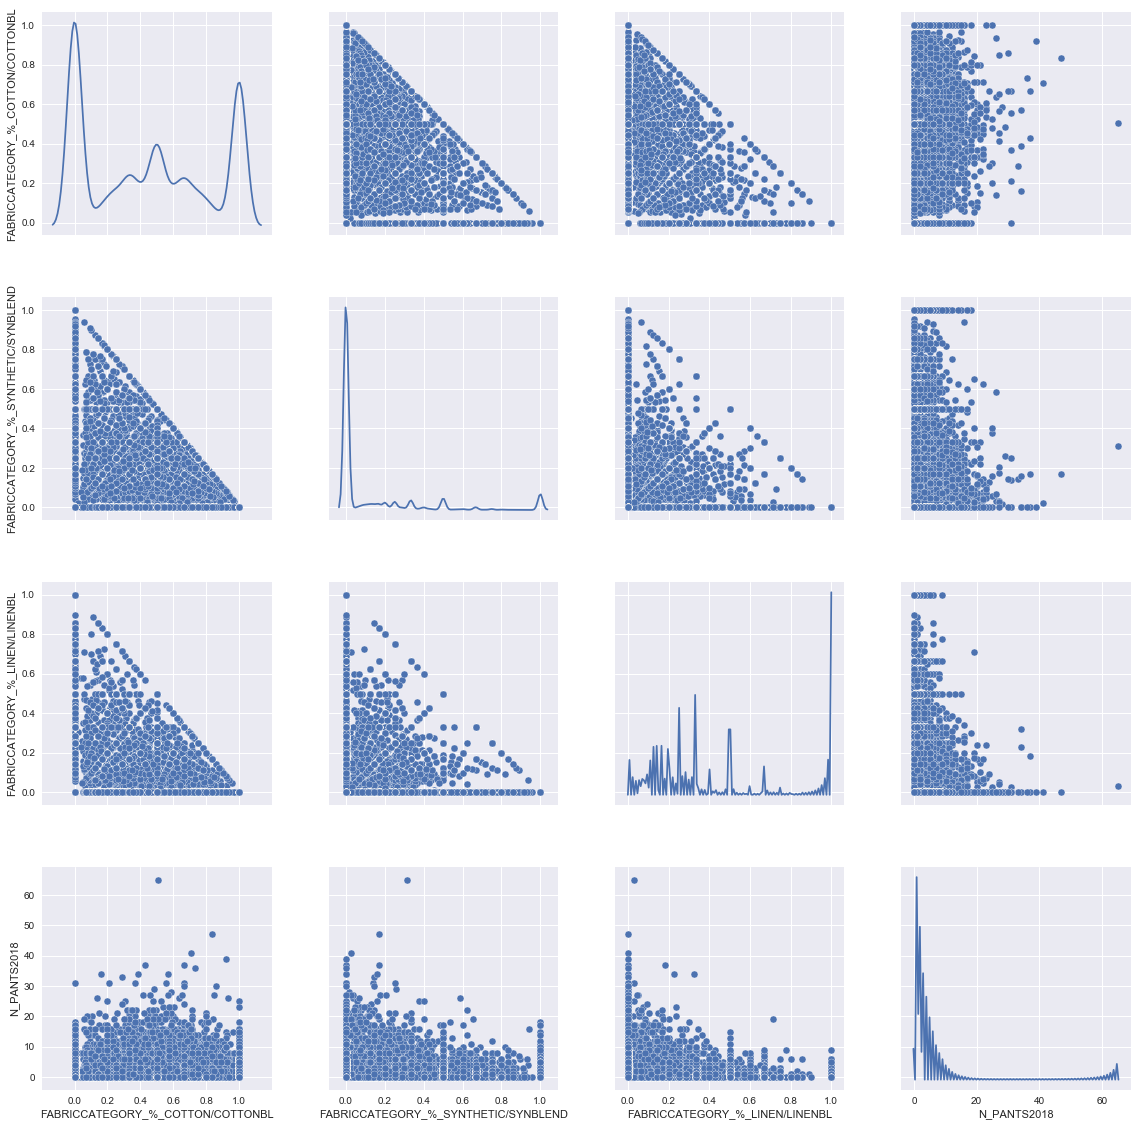

In [99]:
fts = CATEG_FTS[27:30]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);